In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits = loadtxt(open("train.csv","r"),delimiter=",",skiprows=1)

In [3]:
X_raw = digits[:,1:]

In [4]:
y = digits[:,0]

In [51]:
y_small = y[:10000]
X_small = X_raw[:10000]

In [6]:
# Rescale grayscale from -1 to 1
X_raw = X_raw/255.0*2 - 1

In [7]:
from sklearn.decomposition import PCA
pca = PCA(80)

pca.fit(X_raw)

U = pca.transform(X_raw)

In [8]:
from sklearn import svm
from sklearn import cross_validation
rbfmodel = svm.SVC(kernel='rbf')
rbfmodel.gamma = 0.01
rbfmodel.C = 10

rbfmodel.fit(U, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
test = loadtxt(open("test.csv","r"),delimiter=",",skiprows=1)
test = test/255.0*2 - 1
Utest = pca.transform(test)

In [10]:
y_pred = rbfmodel.predict(Utest)

In [41]:
from sklearn import grid_search

param_grid = {'C': logspace(0, 4, 5)}

gs = grid_search.GridSearchCV(rbfmodel, param_grid)
gs.fit(U, y_small)
gs.best_params_



{'C': 10.0}

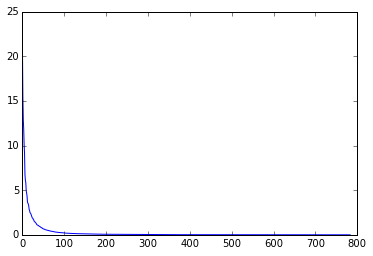

In [49]:
plt.plot(pca.explained_variance_)

83


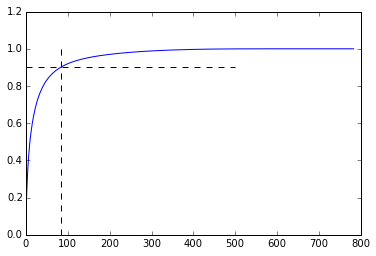

In [50]:
ev_cumsum = np.cumsum(pca.explained_variance_)/(pca.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print(ev_at90)

plt.plot(ev_cumsum)
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 500, linestyles='dashed');

In [17]:
prediction = rbfmodel.predict(U_test)

In [11]:
with open("result.csv", 'w') as f:
    f.write("label, ImageId\n")
    for i, c in enumerate(y_pred):
            f.write("%d, %d\n" % (c, i+1))